### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [44]:
### Begin Assignment Here
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [2]:
# exercise 2
X.iat[100,2]

'alt.atheism'

In [3]:
# ex 5
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()

# ans: because the datatype is a string or char using ' ', any content using this or inside will be considered as a string/char, e.g 'blabla'

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [50]:
# ex 6
X_sample = X.sample(n=1000)
X_sample[0:4]
# in this example we take a few sample article using .sample() and in the parameter we can take a few sample from our created data. 
# for our case we take 1000, and the order of the data will be randomize, since it take the sample randomly

,text,category,category_name
1944,From: aron@tikal.ced.berkeley.edu (Aron Bonar)...,1,comp.graphics
206,From: jil@donuts0.uucp (Jamie Lubin) Subject: ...,2,sci.med
1478,From: dr_bobo@ponton.hanse.de (Boris Pruessman...,1,comp.graphics
630,From: graeme@labtam.labtam.oz.au (Graeme Gill)...,1,comp.graphics


In [49]:
# ex 8
import matplotlib.pyplot as plt
%matplotlib inline
#plot method 1

A = X_sample.category_name.value_counts().reindex_like(X.category_name.value_counts())
B = X.category_name.value_counts()

X_axis = np.arange(len(categories))

plt.bar(X_axis - 0.1, B, 0.2, label = 'X')
plt.bar(X_axis + 0.1, A, 0.2, label = 'X_sample')

plt.xticks(X_axis, X.category_name.value_counts().index.tolist())
plt.title("Category Distribution")
plt.legend()
plt.show()
#plot method 2
X_sample.category_name.value_counts().reindex_like(X.category_name.value_counts()).plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(X_sample.category_name.value_counts())], 
                                           rot = 0, fontsize = 12, figsize = (8,5), position = 0, width = 0.2, color = 'orange', legend = True)
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,5), position = 1, width = 0.2, legend = True)

NameError: name 'X_sample' is not defined

In [46]:
import nltk

from sklearn.feature_extraction.text import CountVectorizer
# ex 10
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# ex 10
idx = np.where(X_counts[4,0:1000].toarray() == 1)[1][1]
count_vect.get_feature_names_out()[idx:idx+1]



array(['01'], dtype=object)

    10  aids  care  children  dyer  evidence  hiv  msg  nasa  patients
0    0     0     0         0     0         0    0    0     0         0
1    0     0     0         0     0         0    0    0     0         0
2    0     0     0         0     0         0    0    7     0         0
3    1     0     0         0     0         0    0    0     0         0
4    0     0     0         0     0         0    0    0     0         0
..  ..   ...   ...       ...   ...       ...  ...  ...   ...       ...
95   0     0     1         0     0         0    0    0     0         0
96   0     0     0         0     2         0    0    0     0         0
97   0     0     0         0     0         0    0    0     0         0
98   0     0     0         0     0         0    0    0     0         0
99   0     0     0         0     0         0    0    0     0         0

[100 rows x 10 columns]


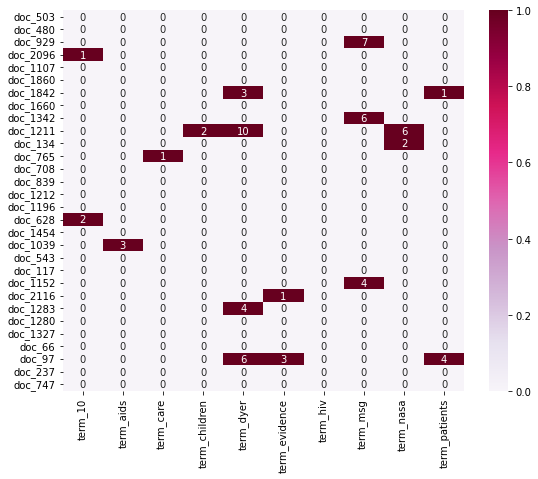

In [7]:
# ex 11
import seaborn as sns
'''here I'm trying to take use a single category of the category_name = sci.med
i think when using a single category, you will find word that are in common and will be used by other article'''
X_sample_sci_med = X[X['category_name']== "sci.med"].sample(n= 100)
count_vect_sci_med = CountVectorizer(min_df = 2, max_features = 10, max_df = 10)
'''
'''
X_counts_sci_med = count_vect_sci_med.fit_transform(X_sample_sci_med.text) #learn the vocabulary and return document-term matrix

plot_x_sc = ["term_"+str(i) for i in count_vect_sci_med.get_feature_names_out()[0:30]]
plot_y_sc = ["doc_"+ str(i) for i in list(X_sample_sci_med.index)[0:30]]
plot_z_sc = X_counts_sci_med[0:30, 0:30].toarray()

df_todraw = pd.DataFrame(plot_z_sc, columns = plot_x_sc, index = plot_y_sc)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

count_array = X_counts_sci_med.toarray()
df = pd.DataFrame(data=count_array,columns = count_vect_sci_med.get_feature_names_out())
print(df)

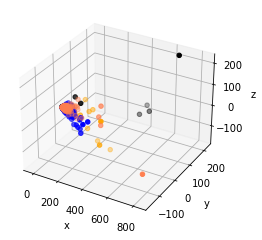

In [8]:
# ex 12
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
# ex 13

21


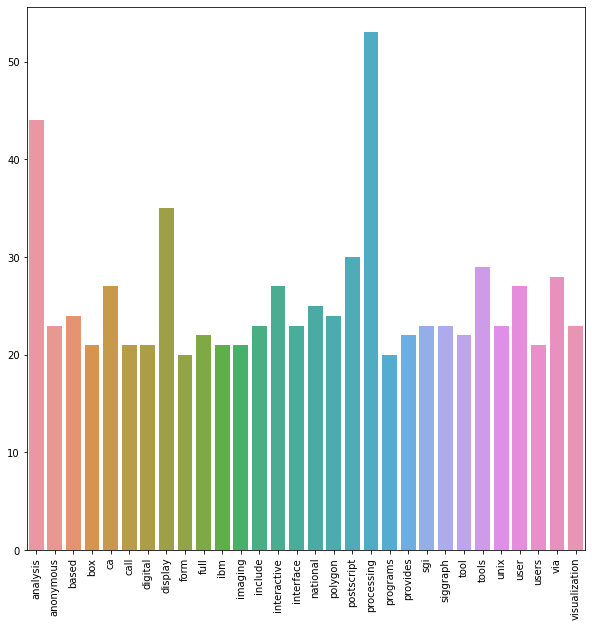

In [72]:
# ex 14
import seaborn as sns
X_sample_comp_graphics = X[X['category_name']== "comp.graphics"].sample(n= 200)
count_vect_comp_graphics = CountVectorizer(min_df = 1,max_features = 30,  max_df = 10,token_pattern=r'(?<![^\s_])[^\W_]{2,}(?![^\s_])')
X_counts_comp_graphics = count_vect_comp_graphics.fit_transform(X_sample_comp_graphics.text)

term_frequencies = []
for j in range(0,X_counts_comp_graphics.shape[1]):
    term_frequencies.append(sum(X_counts_comp_graphics[:,j].toarray()))
print(term_frequencies[3][0])

term_frequencies = np.asarray(X_counts_comp_graphics.sum(axis=0))[0]


plt.subplots(figsize=(10, 10))
g = sns.barplot(x=count_vect_comp_graphics.get_feature_names_out()[:], 
            y=term_frequencies[:])
g.set_xticklabels(count_vect_comp_graphics.get_feature_names_out()[:], rotation = 90);

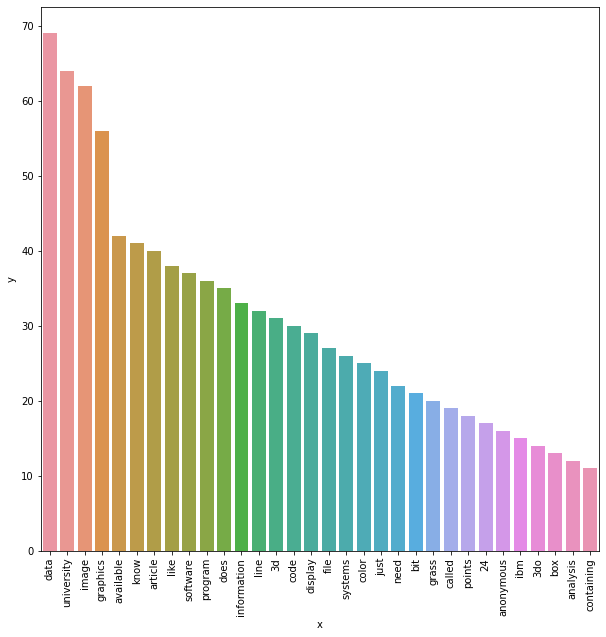

In [54]:
# ex 15
import seaborn as sns
import math
X_sample_comp_graphics = X[X['category_name']== "comp.graphics"].sample(n= 100)
count_vect_comp_graphics = CountVectorizer(min_df = 0, max_features = 100, token_pattern=r'(?<![^\s_])[^\W_]{2,}(?![^\s_])', stop_words = 'english')
X_counts_comp_graphics = count_vect_comp_graphics.fit_transform(X_sample_comp_graphics.text)

term_frequencies = []
for j in range(0,X_counts_comp_graphics.shape[1]):
    term_frequencies.append(sum(X_counts_comp_graphics[:,j].toarray()))

name_out = count_vect_comp_graphics.get_feature_names_out()
name_out_ex = np.asarray(name_out)

term_frequencies = np.asarray(X_counts_comp_graphics.sum(axis=0))[0]

x = dict(sorted(zip(term_frequencies, name_out_ex), reverse = True))
key_1 = []
value_1 = []
for key, value in x.items():
    key_1.append(int(key))
    value_1.append(value)

count_array = X_counts_comp_graphics.toarray()
plt.subplots(figsize=(10, 10))
df = pd.DataFrame({"y": key_1,
                   "x": value_1})
b = sns.barplot(x= 'x',
            y= 'y', data=df)
b.set_xticklabels(value_1, rotation = 90);

In [80]:
# ex 16
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[X["category"] == 0]

,text,category,category_name,bin_category
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism,"[1, 0, 0, 0]"
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism,"[1, 0, 0, 0]"
17,Organization: Penn State University From: <JSN...,0,alt.atheism,"[1, 0, 0, 0]"
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism,"[1, 0, 0, 0]"
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism,"[1, 0, 0, 0]"
...,...,...,...,...
2231,"Subject: Re: Feminism and Islam, again From: k...",0,alt.atheism,"[1, 0, 0, 0]"
2233,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism,"[1, 0, 0, 0]"
2234,From: David.Rice@ofa123.fidonet.org Subject: i...,0,alt.atheism,"[1, 0, 0, 0]"
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism,"[1, 0, 0, 0]"


In [1]:
import sklearn.feature_extraction.text
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
txt_data_1 = pd.read_table("txt_data/yelp_labelled.txt",index_col = False, names =  ['sentence', 'score'])
txt_data_2 = pd.read_table("txt_data/imdb_labelled.txt",index_col = False, names =  ['sentence', 'score'])
txt_data_3 = pd.read_table("txt_data/amazon_cells_labelled.txt",index_col = False, names =  ['sentence', 'score'])

categories = ['imdb', 'amazon', 'yelp']

print(txt_data_1)

                                              sentence  score
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [2]:
df_yelp = pd.DataFrame.from_records(txt_data_1)
df_yelp["category"] = categories[2]
df_yelp["id_no"] = int(0)
df_imdb = pd.DataFrame.from_records(txt_data_2)
df_imdb["category"] = categories[0]
df_imdb["id_no"] = int(1)
df_amazon = pd.DataFrame.from_records(txt_data_3)
df_amazon["category"] = categories[1]
df_amazon["id_no"] = int(2)

frames = [df_yelp, df_imdb, df_amazon]

df_all = pd.concat(frames, ignore_index = True)
df_all = df_all.sample(frac=1).reset_index(drop = True)

In [24]:
df_all

,sentence,score,category,id_no
0,It makes very strange ticking noises before it...,0,amazon,2
1,It's A PIECE OF CRAP!,0,amazon,2
2,I guess maybe we went on an off night but it w...,0,yelp,0
3,So don't go there if you are looking for good ...,0,yelp,0
4,What a great double cheeseburger!,1,yelp,0
...,...,...,...,...
2743,After two I felt disgusting.,0,yelp,0
2744,Works well.,1,amazon,2
2745,i got this phone around the end of may and i'm...,0,amazon,2
2746,"As a courtroom drama, it's compelling, as an i...",1,imdb,1


In [25]:
df_all.loc[:11,"sentence"]


0     It makes very strange ticking noises before it...
1                                 It's A PIECE OF CRAP!
2     I guess maybe we went on an off night but it w...
3     So don't go there if you are looking for good ...
4                     What a great double cheeseburger!
5          Some highlights : Great quality nigiri here!
6                              Wow... Loved this place.
7     She ordered a toasted English muffin that came...
8                        Would not recommend to others.
9             O my gosh the best phone I have ever had.
10                                        disappointed.
11    This is a great product..... sure beats using ...
Name: sentence, dtype: object

In [26]:
df_all[df_all["category"] == "imdb"].iloc[0:10]

,sentence,score,category,id_no
13,This movie is a solid example of a bad plot an...,0,imdb,1
14,Lange had become a great actress.,1,imdb,1
16,I know that Jim O'Connor was very energetic an...,0,imdb,1
22,Lewis Black's considerable talent is wasted he...,0,imdb,1
23,I let my girlfriend talk me into seeing this -...,0,imdb,1
26,If only someone involved with it knew how to s...,0,imdb,1
34,"Bad characters, bad story and bad acting.",0,imdb,1
36,I just saw this film and I recommend it.,1,imdb,1
41,"By the time the film ended, I not only dislike...",0,imdb,1
49,It even has its sweet moments.,1,imdb,1


In [27]:
df_all.isnull()

,sentence,score,category,id_no
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2743,False,False,False,False
2744,False,False,False,False
2745,False,False,False,False
2746,False,False,False,False


In [28]:
df_all.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,category,id_no
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [29]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 0,
                             'id_no': 1, 
                             'category': "dummy category"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 0,
                             'id_no': 1, 
                             'category': "dummy category"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 0,
                             'id_no': 1, 
                        }]
df_dummy = pd.concat([df_all, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [30]:
df_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,category,id_no
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,0


In [31]:
df_dupli = df_dummy[df_dummy.duplicated('sentence', keep = False)]

In [32]:
print(df_dupli)
#from here we noticed that there's actually many duplicated review
# so for our original dataframe we will remove all the duplicates

                                               sentence  score  \
194                    Definitely worth checking out.        1   
207                              The food was terrible.      0   
228   If you like a loud buzzing to override all you...      0   
314                                        Great phone.      1   
355                                             10/10        1   
393                                  Not recommended.        0   
415                                        Works great.      1   
496                                  I love this place.      1   
590                               This is a great deal.      1   
605                                       Does not fit.      0   
644                                        Great Phone.      1   
783                                    I won't be back.      0   
861                                        Works great.      1   
974                                       Works great!.      1   
1071      

In [33]:
df_all.drop_duplicates(keep='first', inplace=True)

In [34]:
len(df_all)

2731

In [35]:
df_sample = df_all.sample(n=1000)

yelp      377
amazon    350
imdb      273
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

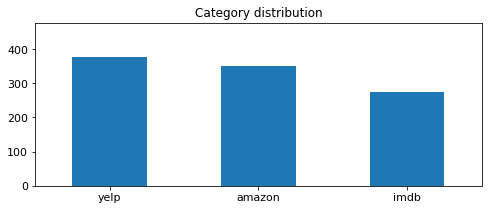

In [36]:
print(df_sample.category.value_counts().reindex_like(df_all.category.value_counts()))

# plot barchart for X
df_sample.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(df_sample.category.value_counts())+100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      996
amazon    990
imdb      745
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

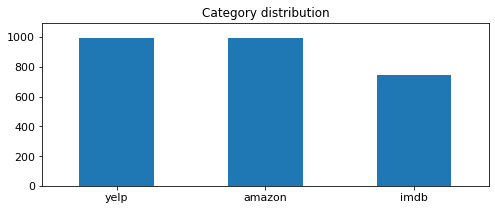

In [37]:
print(df_all.category.value_counts())

# plot barchart for X
df_all.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(df_all.category.value_counts())+100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

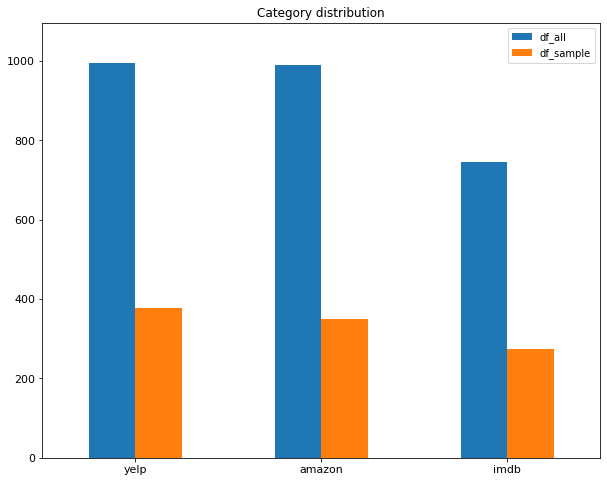

In [38]:
bar_sample_all = pd.DataFrame({'df_all' : df_all.category.value_counts(),
                               'df_sample' : df_sample.category.value_counts().reindex_like(df_all.category.value_counts())}, 
                              index = df_all.category.value_counts().index.tolist())

df_plot = bar_sample_all.plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(df_all.category.value_counts())+100],        
                                    rot = 0, fontsize = 11, figsize = (10,8))

In [39]:
import nltk
import helpers.data_mining_helpers as dmh
df_all['unigrams'] = df_all['sentence'].apply(lambda x: dmh.tokenize_text(x))
print(df_all)

                                               sentence  score category  \
0     It makes very strange ticking noises before it...      0   amazon   
1                                 It's A PIECE OF CRAP!      0   amazon   
2     I guess maybe we went on an off night but it w...      0     yelp   
3     So don't go there if you are looking for good ...      0     yelp   
4                     What a great double cheeseburger!      1     yelp   
...                                                 ...    ...      ...   
2743                       After two I felt disgusting.      0     yelp   
2744                                        Works well.      1   amazon   
2745  i got this phone around the end of may and i'm...      0   amazon   
2746  As a courtroom drama, it's compelling, as an i...      1     imdb   
2747       Phone is sturdy as all nokia bar phones are.      1   amazon   

      id_no                                           unigrams  
0         2  [It, makes, very, str

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df = 2,max_features = 50, stop_words = 'english')
df_counts = count_vect.fit_transform(df_all.sentence) #learn the vocabulary and return document-term matrix
count_vect.get_feature_names_out()[0:10]

array(['10', 'acting', 'amazing', 'bad', 'battery', 'best', 'better',
       'characters', 'did', 'didn'], dtype=object)

In [41]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

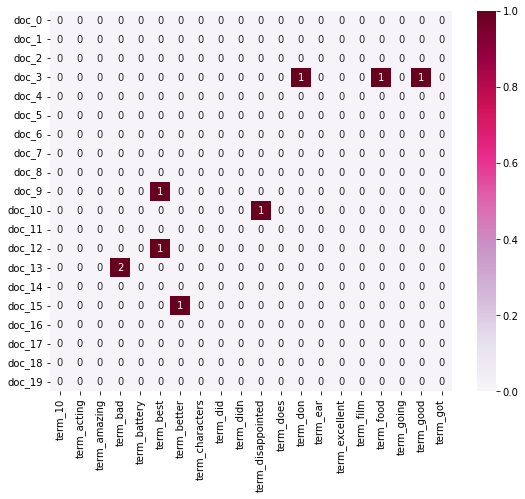

In [42]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df_all.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

     amazing  atmosphere  awesome  bacon  best  bread  came  chicken  come  \
0          0           0        0      0     0      0     0        0     0   
1          0           0        0      0     0      0     0        0     0   
2          0           0        0      0     0      0     0        0     0   
3          0           0        0      0     0      0     0        0     0   
4          0           0        0      0     0      0     0        0     0   
..       ...         ...      ...    ...   ...    ...   ...      ...   ...   
295        0           0        0      0     0      0     0        0     0   
296        0           0        0      1     0      0     0        0     0   
297        0           0        0      0     0      0     0        0     0   
298        0           0        0      0     0      0     0        0     0   
299        0           0        0      0     0      0     0        0     0   

     cooked  ...  service  staff  stars  super  thing  time  ve

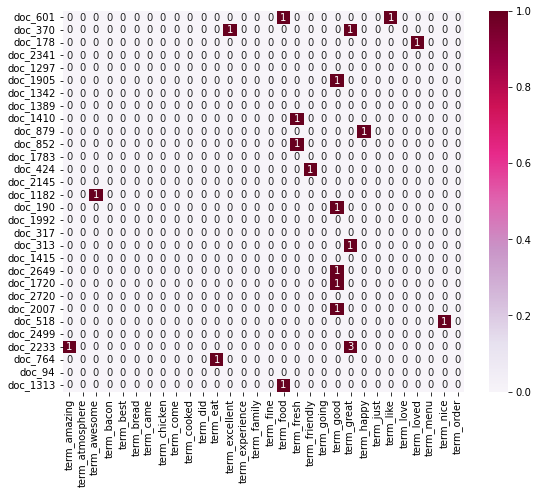

In [43]:
df_sample_yelp = df_all[df_all['category']== 'yelp']
df_sample_good_review_yelp = df_sample_yelp[df_sample_yelp['score']== 1].sample(n= 300)
count_vect_good_review_yelp = CountVectorizer(max_features = 50, token_pattern=r'(?<![^\s_])[^\W_]{2,}(?![^\s_])', stop_words = 'english')
df_counts_good_review_yelp = count_vect_good_review_yelp.fit_transform(df_sample_good_review_yelp.sentence)


plot_x_sc = ["term_"+str(i) for i in count_vect_good_review_yelp.get_feature_names_out()[0:30]]
plot_y_sc = ["doc_"+ str(i) for i in list(df_sample_good_review_yelp.index)[0:30]]
plot_z_sc = df_counts_good_review_yelp[0:30, 0:30].toarray()

df_todraw = pd.DataFrame(plot_z_sc, columns = plot_x_sc, index = plot_y_sc)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

count_array = df_counts_good_review_yelp.toarray()
df = pd.DataFrame(data=count_array,columns = count_vect_good_review_yelp.get_feature_names_out())
print(df)

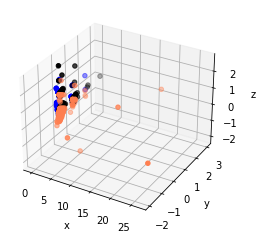

In [44]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
X_reduced_3 = PCA(n_components = 3).fit_transform(df_counts.toarray())

for c, category in zip(col, categories):
    xs = X_reduced_3[df_all['category'] == category].T[0]
    ys = X_reduced_3[df_all['category'] == category].T[1]
    zs = X_reduced_3[df_all['category'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [45]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [46]:
print(term_frequencies)

[array([36], dtype=int64), array([43], dtype=int64), array([34], dtype=int64), array([103], dtype=int64), array([46], dtype=int64), array([78], dtype=int64), array([53], dtype=int64), array([35], dtype=int64), array([49], dtype=int64), array([42], dtype=int64), array([35], dtype=int64), array([36], dtype=int64), array([79], dtype=int64), array([35], dtype=int64), array([52], dtype=int64), array([163], dtype=int64), array([125], dtype=int64), array([34], dtype=int64), array([230], dtype=int64), array([39], dtype=int64), array([204], dtype=int64), array([48], dtype=int64), array([119], dtype=int64), array([124], dtype=int64), array([35], dtype=int64), array([60], dtype=int64), array([42], dtype=int64), array([182], dtype=int64), array([53], dtype=int64), array([164], dtype=int64), array([112], dtype=int64), array([43], dtype=int64), array([33], dtype=int64), array([54], dtype=int64), array([66], dtype=int64), array([103], dtype=int64), array([49], dtype=int64), array([34], dtype=int64), 

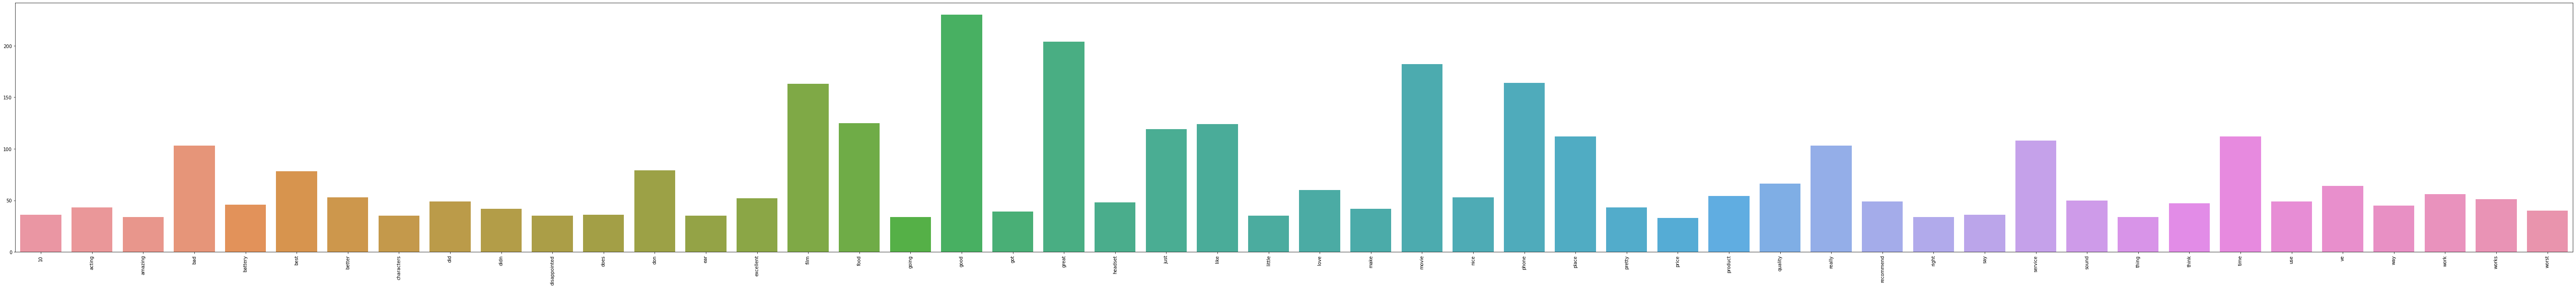

In [47]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:], 
            y=term_frequencies[:])
g.set_xticklabels(count_vect.get_feature_names_out()[:], rotation = 90);

4


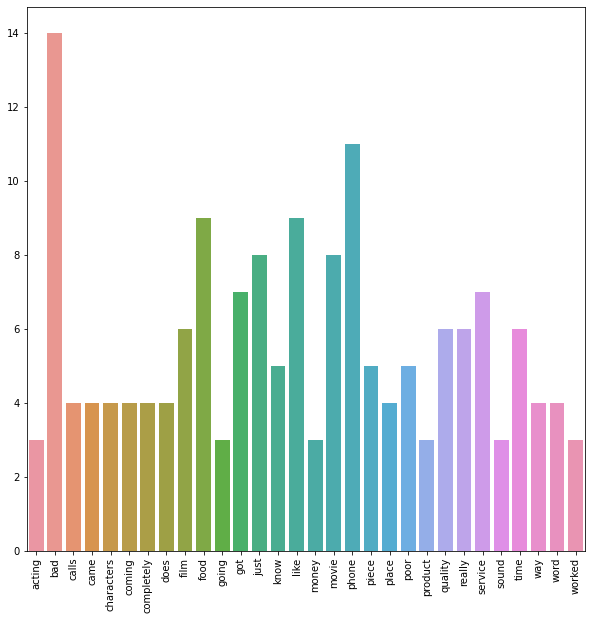

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_sample_bad_review = df_all[df_all['score']== 0].sample(n= 200)
count_vect_bad_review = CountVectorizer(min_df = 1,max_features = 30, token_pattern=r'(?<![^\s_])[^\W_]{2,}(?![^\s_])', stop_words = 'english')
df_counts_bad_review = count_vect_bad_review.fit_transform(df_sample_bad_review.sentence)

term_frequencies = []
for j in range(0,df_counts_bad_review.shape[1]):
    term_frequencies.append(sum(df_counts_bad_review[:,j].toarray()))
print(term_frequencies[3][0])

term_frequencies = np.asarray(df_counts_bad_review.sum(axis=0))[0]


plt.subplots(figsize=(10, 10))
g = sns.barplot(x=count_vect_bad_review.get_feature_names_out()[:], 
            y=term_frequencies[:])
g.set_xticklabels(count_vect_bad_review.get_feature_names_out()[:], rotation = 90);

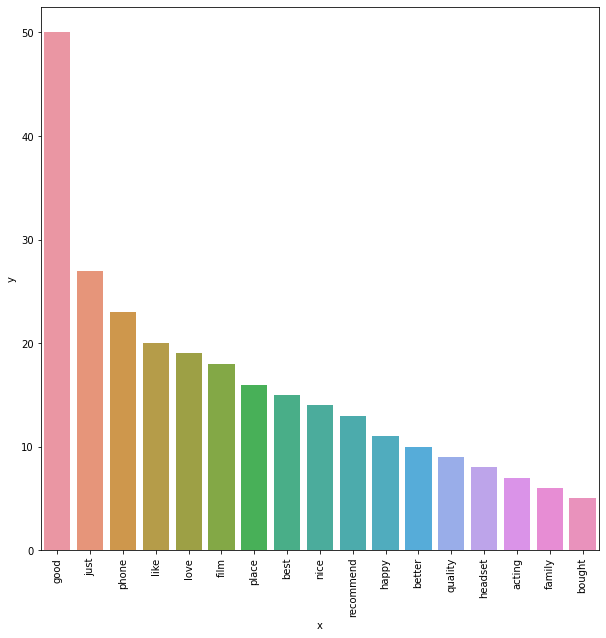

In [28]:
import seaborn as sns
import math
df_sample_good_review = df_all[df_all['score']== 1].sample(n= 500)
count_vect_good_review = CountVectorizer(max_features = 50, token_pattern=r'(?<![^\s_])[^\W_]{2,}(?![^\s_])', stop_words = 'english')
df_counts_good_review = count_vect_good_review.fit_transform(df_sample_good_review.sentence)

term_frequencies = []
for j in range(0,df_counts_good_review.shape[1]):
    term_frequencies.append(sum(df_counts_good_review[:,j].toarray()))

name_out = count_vect_good_review.get_feature_names_out()
name_out_ex = np.asarray(name_out)

term_frequencies = np.asarray(df_counts_good_review.sum(axis=0))[0]

x = dict(sorted(zip(term_frequencies, name_out_ex), reverse = True))
key_1 = []
value_1 = []
for key, value in x.items():
    key_1.append(int(key))
    value_1.append(value)

count_array = df_counts_good_review.toarray()
plt.subplots(figsize=(10, 10))
df = pd.DataFrame({"y": key_1,
                   "x": value_1})
b = sns.barplot(x= 'x',
            y= 'y', data=df)
b.set_xticklabels(value_1, rotation = 90);

In [50]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [51]:
mlb.fit(df_all.category)
df_all['bin_category'] = mlb.transform(df_all['category']).tolist()
df_all[0:9]

,sentence,score,category,id_no,unigrams,bin_category
0,It makes very strange ticking noises before it...,0,amazon,2,"[It, makes, very, strange, ticking, noises, be...","[1, 0, 0]"
1,It's A PIECE OF CRAP!,0,amazon,2,"[It, 's, A, PIECE, OF, CRAP, !]","[1, 0, 0]"
2,I guess maybe we went on an off night but it w...,0,yelp,0,"[I, guess, maybe, we, went, on, an, off, night...","[0, 0, 1]"
3,So don't go there if you are looking for good ...,0,yelp,0,"[So, do, n't, go, there, if, you, are, looking...","[0, 0, 1]"
4,What a great double cheeseburger!,1,yelp,0,"[What, a, great, double, cheeseburger, !]","[0, 0, 1]"
5,Some highlights : Great quality nigiri here!,1,yelp,0,"[Some, highlights, :, Great, quality, nigiri, ...","[0, 0, 1]"
6,Wow... Loved this place.,1,yelp,0,"[Wow, ..., Loved, this, place, .]","[0, 0, 1]"
7,She ordered a toasted English muffin that came...,0,yelp,0,"[She, ordered, a, toasted, English, muffin, th...","[0, 0, 1]"
8,Would not recommend to others.,0,yelp,0,"[Would, not, recommend, to, others, .]","[0, 0, 1]"


In [52]:
mlb.fit(df_all.id_no)
df_all['bin_category'] = mlb.transform(df_all['id_no']).tolist()
df_all[0:9]

,sentence,score,category,id_no,unigrams,bin_category
0,It makes very strange ticking noises before it...,0,amazon,2,"[It, makes, very, strange, ticking, noises, be...","[0, 0, 1]"
1,It's A PIECE OF CRAP!,0,amazon,2,"[It, 's, A, PIECE, OF, CRAP, !]","[0, 0, 1]"
2,I guess maybe we went on an off night but it w...,0,yelp,0,"[I, guess, maybe, we, went, on, an, off, night...","[1, 0, 0]"
3,So don't go there if you are looking for good ...,0,yelp,0,"[So, do, n't, go, there, if, you, are, looking...","[1, 0, 0]"
4,What a great double cheeseburger!,1,yelp,0,"[What, a, great, double, cheeseburger, !]","[1, 0, 0]"
5,Some highlights : Great quality nigiri here!,1,yelp,0,"[Some, highlights, :, Great, quality, nigiri, ...","[1, 0, 0]"
6,Wow... Loved this place.,1,yelp,0,"[Wow, ..., Loved, this, place, .]","[1, 0, 0]"
7,She ordered a toasted English muffin that came...,0,yelp,0,"[She, ordered, a, toasted, English, muffin, th...","[1, 0, 0]"
8,Would not recommend to others.,0,yelp,0,"[Would, not, recommend, to, others, .]","[1, 0, 0]"


In [17]:
from sklearn.preprocessing import binarize
df_sample_yelp = df_all[df_all['category']== 'yelp']
df_sample_good_review_yelp = df_sample_yelp[df_sample_yelp['score']== 1].sample(n= 350)
count_vect_good_review_yelp = CountVectorizer(max_features = 30, stop_words = 'english')
df_counts_good_review_yelp = count_vect_good_review_yelp.fit_transform(df_sample_good_review_yelp.sentence)

df_sample_imdb = df_all[df_all['category']== 'imdb']
df_sample_good_review_imdb = df_sample_imdb[df_sample_imdb['score']== 1].sample(n= 350)
count_vect_good_review_imdb = CountVectorizer(max_features = 30, stop_words = 'english')
df_counts_good_review_imdb = count_vect_good_review_imdb.fit_transform(df_sample_good_review_imdb.sentence)

df_sample_amazon = df_all[df_all['category']== 'amazon']
df_sample_good_review_amazon = df_sample_amazon[df_sample_amazon['score']== 1].sample(n= 350)
count_vect_good_review_amazon = CountVectorizer(max_features = 30, stop_words = 'english')
df_counts_good_review_amazon = count_vect_good_review_amazon.fit_transform(df_sample_good_review_amazon.sentence)




In [21]:

list_1 = [[''],[''],['']]
for x, y, z in zip(df_sample_good_review_yelp.sentence, df_sample_good_review_imdb.sentence, df_sample_good_review_amazon.sentence):
    list_1[0][0] +=  x + " "
    list_1[1][0] +=  y + " "
    list_1[2][0] +=  z + " "

df_counts_good_review_yelp = count_vect_good_review_yelp.transform(list_1[0])
df_counts_good_review_imdb = count_vect_good_review_imdb.transform(list_1[1])
df_counts_good_review_amazon = count_vect_good_review_amazon.transform(list_1[2])
df_counts_good_review_yelp.shape
#df_counts_good_review_imdb.shape


(1, 30)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_count_1_2 = cosine_similarity(df_counts_good_review_yelp, df_counts_good_review_imdb, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(df_counts_good_review_yelp, df_counts_good_review_amazon, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(df_counts_good_review_imdb, df_counts_good_review_amazon, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.556976
Cosine Similarity using count bw 1 and 3: 0.752643
Cosine Similarity using count bw 2 and 3: 0.540912


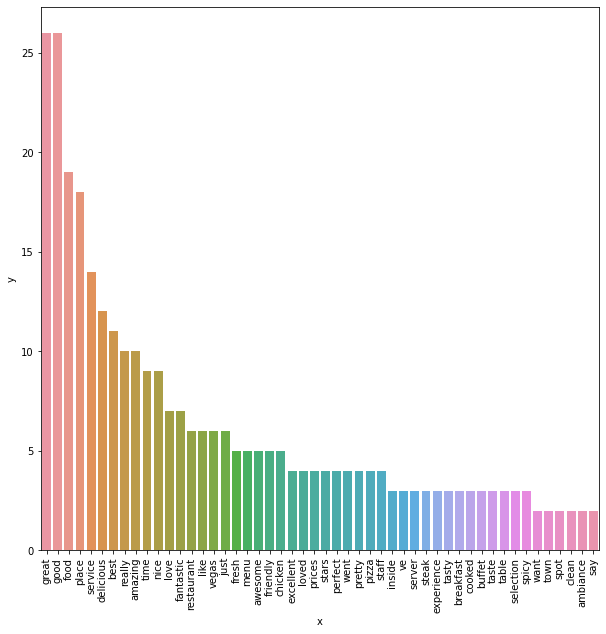

In [113]:
from sklearn.preprocessing import binarize
from sklearn.feature_extraction.text import TfidfVectorizer
df_sample_yelp = df_all[df_all['category']== 'yelp']
df_sample_good_review_yelp = df_sample_yelp[df_sample_yelp['score']== 1].sample(n= 300)
count_vect_good_review_yelp = TfidfVectorizer(max_features = 50, stop_words = 'english')
df_counts_good_review_yelp = count_vect_good_review_yelp.fit_transform(df_sample_good_review_yelp.sentence)

term_frequencies = []
for j in range(0,df_counts_good_review.shape[1]):
    term_frequencies.append(sum(df_counts_good_review_yelp[:,j].toarray()))

name_out = count_vect_good_review_yelp.get_feature_names_out()
name_out_ex = np.asarray(name_out)

term_frequencies = np.asarray(df_counts_good_review_yelp.sum(axis=0))[0]

x = dict(sorted(zip(term_frequencies, name_out_ex), reverse = True))
key_1 = []
value_1 = []
for key, value in x.items():
    key_1.append(int(key))
    value_1.append(value)

count_array = df_counts_good_review_yelp.toarray()
plt.subplots(figsize=(10, 10))
df = pd.DataFrame({"y": key_1,
                   "x": value_1})
b = sns.barplot(x= 'x',
            y= 'y', data=df)
b.set_xticklabels(value_1, rotation = 90);

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_all, test_size=0.2)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(CountVectorizer(max_features = 1000, token_pattern=r'(?<![^\s_])[^\W_]{2,}(?![^\s_])', stop_words = 'english'), 
                      MultinomialNB(alpha=1))
model.fit(train.sentence, train.score)

#Predict labels for the test set
labels = model.predict(test.sentence)

In [34]:
model.score(train.sentence, train.score)

0.8284804367606915

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# Create a pipeline
model = make_pipeline(TfidfVectorizer(max_features = 100, stop_words = 'english'), 
                      MultinomialNB(alpha=1))

# Fit the model with training setbb
model.fit(train.sentence, train.id_no)

#Predict labels for the test set
labels = model.predict(test.sentence)



In [36]:
model.score(train.sentence, train.id_no)

0.7224749772520473

In [92]:
model.predict(test.sentence)

array([1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2,
       1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2,
       2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2,

Text(33.0, 0.5, 'Predicted label')

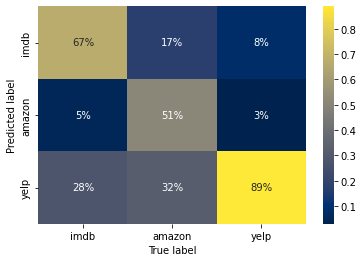

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(test.id_no, labels, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=categories, yticklabels=categories)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [93]:
model.fit(train.sentence, train.score)

#Predict labels for the test set
labels = model.predict(test.sentence)

In [95]:
model.score(train.sentence, train.score)

0.8411172161172161

Text(33.0, 0.5, 'Predicted label')

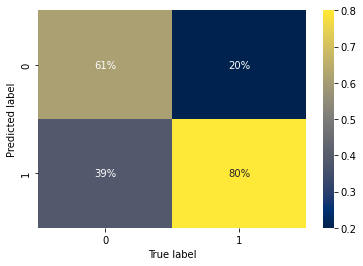

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(test.score, labels, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=["0","1"], yticklabels=["0","1"])
plt.xlabel("True label")
plt.ylabel("Predicted label")